# **Project 4**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.__version__

In [ ]:
# Load Data
df = pd.read_csv('adult.csv')
df

In [ ]:
# Print First and last 10 rows
df.head(10)

In [ ]:
df.tail(10)

In [ ]:
# Shape of our dataset
df.shape

In [ ]:
# Information of dataset
df.info()

In [ ]:
df.describe()

#### **Fetch random sample from dataset (50%)**

In [ ]:
df.sample(frac=0.50)

In [ ]:
# If you want generated random data repeats 
df.sample(frac=0.50,random_state=100)

#### null values in dataset using **seaborn**

In [ ]:
df.isnull().sum()

In [ ]:
sns.heatmap(df.isnull())
# If there is any null values that area will be coloured as faint

#### **Replacing '?' by nan**

In [ ]:
df.isin(['?']).sum()

In [ ]:
#  we have 3 columns having this unnecessary character 
# so we will replace values in these columns
df['workclass'] = df['workclass'].replace(['?'],np.nan)
df['occupation'] = df['occupation'].replace(['?'],np.nan)
df['native-country'] = df['native-country'].replace(['?'],np.nan)
df.isin(['?']).sum()

In [ ]:
# Now in our data there are many null values 
# we will check using visuakization
sns.heatmap(df.isnull())

#### **Data cleaning**

In [ ]:
# Calculate percantage of null values in column
per = df.isnull().sum()*100/len(df)
per

In [34]:
# now drop the missing rows
# df.dropna(how='any',inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

C:\Users\sohal\AppData\Local\Temp\ipykernel_2676\2508228582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
hours-per-week    0
native-country    0
income            0
dtype: int64

#### **Check duplicated data and drop them**

In [38]:
df.duplicated().any()

False

In [36]:
df = df.drop_duplicates()
df.shape

(45167, 12)

#### **Droping unnecessary columns**

In [ ]:
df.columns

In [ ]:
df.drop(['educational-num','capital-gain','capital-loss'],inplace=True,axis=1)
df

## **Univariate analysis**

Univariate analysis in statistics refers to the analysis of a single variable at a time. It's a method used to understand the distribution, central tendency, dispersion, and shape of the data for that particular variable. 

In simpler terms, it's like looking at one piece of the puzzle at a time. For example, if you're studying the heights of people in a population, univariate analysis would involve examining just the distribution of heights without considering any other variables like weight, age, or gender.

Common techniques used in univariate analysis include:

1. Descriptive statistics: This includes measures such as mean, median, mode, standard deviation, and variance, which provide a summary of the data's characteristics.

2. Histograms and frequency tables: These tools help visualize the distribution of the data by showing how frequently different values occur.

3. Box plots: Box plots display the distribution of data based on quartiles, providing information about the spread and skewness of the data.

4. Probability distributions: Univariate analysis often involves fitting probability distributions to the data to describe its underlying structure.

Univariate analysis is typically the first step in statistical analysis and is useful for gaining initial insights into the data before moving on to more complex analyses involving multiple variables.

> What is distribution of age column

In [ ]:
df['age'].describe()

<Axes: >

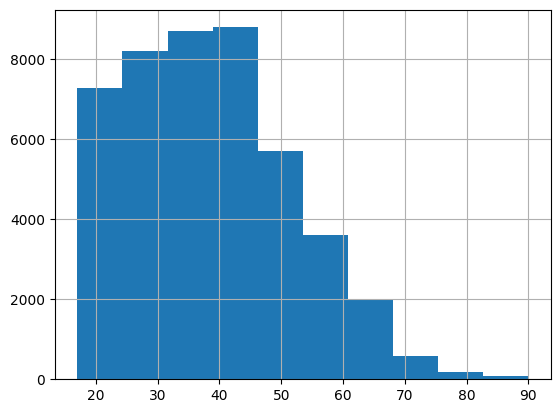

In [39]:
df['age'].hist()

#### **Find number of persons having age between 17 to 48 (inclusive) using between method**

In [ ]:
# Without using between method
sum((df['age']>=17) & (df['age']<=48))

In [41]:
sum(df['age'].between(17,48))

34851

> ### **What is distribution of work class column**

<Axes: >

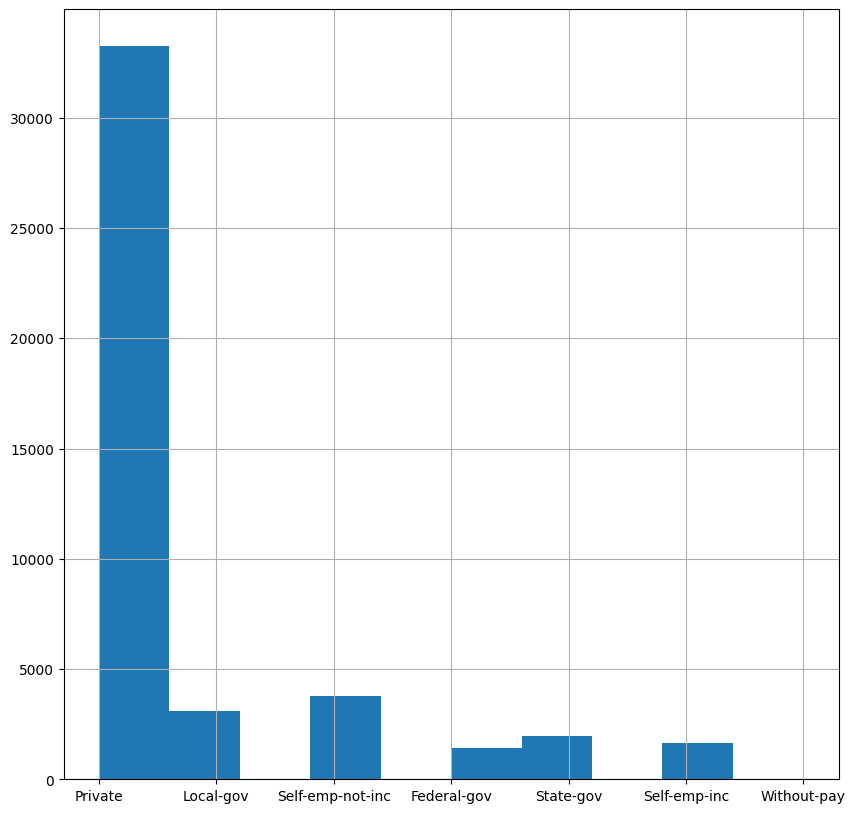

In [42]:
plt.figure(figsize=(10,10))
df['workclass'].hist()

#### **How many persons have batchelors and masters degree**

In [43]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [45]:
# Method 1
filt1 = df['education']=='Bachelors'
filt2 = df['education']=='Masters'
len(df[(filt1) | (filt2)])

10069

In [ ]:
# Methoda 2
sum(df['education'].isin(['Bachelors','Masters']))

## **Bivariate Analysis**

Bivariate analysis in statistics involves the simultaneous analysis of two variables to determine the relationship between them. Unlike univariate analysis, which focuses on a single variable, bivariate analysis examines how two variables are related to each other.

The main goals of bivariate analysis are to:

1. Understand the nature and strength of the relationship between the two variables.
2. Assess the directionality of the relationship (i.e., whether one variable increases as the other increases, decreases as the other decreases, or if there is no clear pattern).
3. Identify any patterns, trends, or correlations between the two variables.

Common techniques used in bivariate analysis include:

1. Scatter plots: These graphs plot one variable against another, allowing visualization of the relationship between the two variables. They can show patterns such as linear relationships, curvilinear relationships, or no relationship at all.

2. Correlation analysis: This involves calculating statistical measures such as Pearson correlation coefficient, Spearman rank correlation coefficient, or Kendall's tau to quantify the strength and direction of the relationship between the two variables. Correlation coefficients range from -1 to 1, where -1 indicates a perfect negative relationship, 0 indicates no relationship, and 1 indicates a perfect positive relationship.

3. Contingency tables: Also known as cross-tabulations, contingency tables are used when both variables are categorical. They display the frequency distribution of the joint occurrence of the two variables, allowing for the examination of associations between categories.

4. Regression analysis: Regression models can be used to quantify the relationship between two variables and to predict the value of one variable based on the value of the other variable. Linear regression, for example, can be used when one variable is continuous and the other is either continuous or categorical.

Bivariate analysis is valuable for understanding the interplay between two variables and is often a precursor to more advanced multivariate analyses, where the relationships between multiple variables are examined simultaneously.

In [ ]:
df.columns

<Axes: xlabel='income', ylabel='age'>

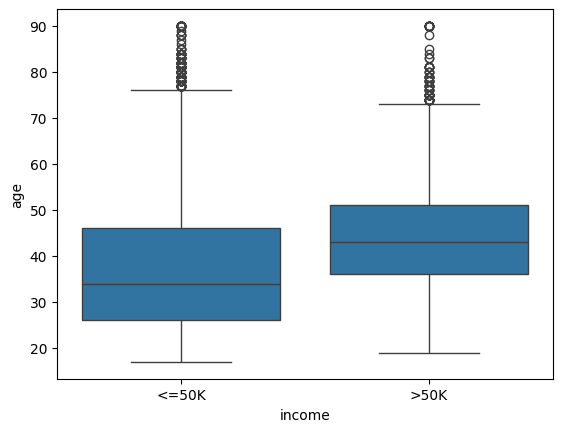

In [46]:
sns.boxplot(x='income',y='age',data=df)

In [ ]:
df['income'].unique()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '11th'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, 'Assoc-acdm'),
  Text(3, 0, 'Some-college'),
  Text(4, 0, '10th'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, '7th-8th'),
  Text(7, 0, 'Bachelors'),
  Text(8, 0, 'Masters'),
  Text(9, 0, '5th-6th'),
  Text(10, 0, 'Assoc-voc'),
  Text(11, 0, '9th'),
  Text(12, 0, 'Doctorate'),
  Text(13, 0, '12th'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Preschool')])

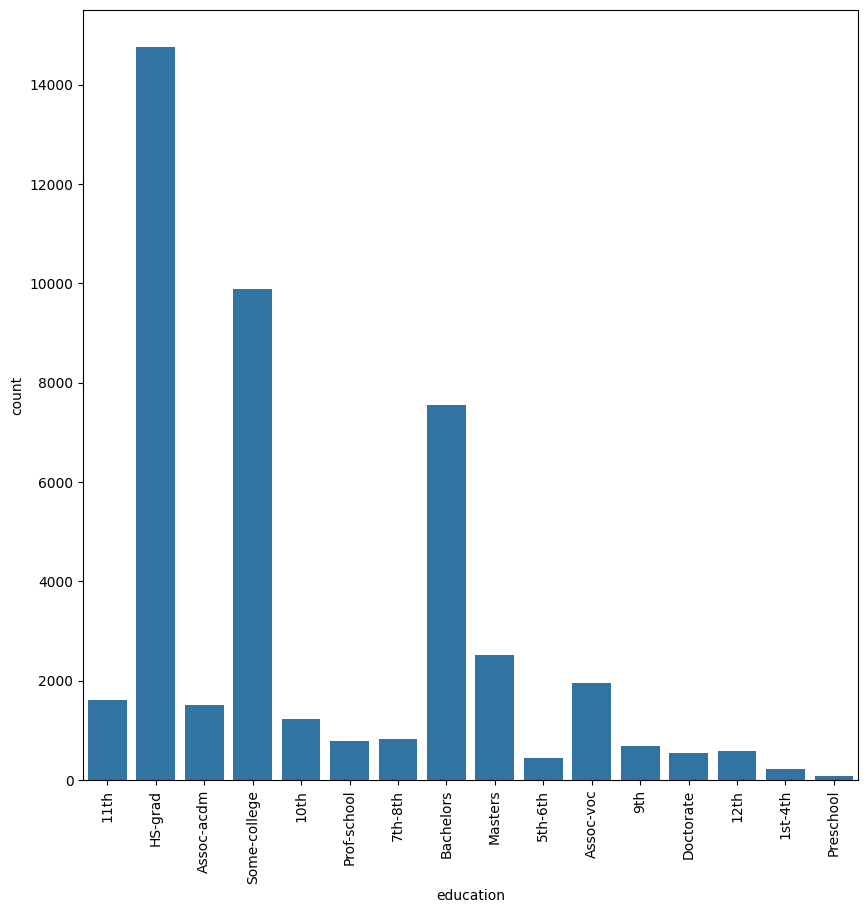

In [51]:
plt.figure(figsize=(10,10))
sns.countplot(x='education',data=df)
plt.xticks(rotation=90)

In [54]:
def changeIncome(sal):
    if sal=='<=50K':
        return 0
    else:
        return 1
df['encoded_Income'] = df['income'].apply(changeIncome)
df['encoded_Income']

C:\Users\sohal\AppData\Local\Temp\ipykernel_2676\3202488559.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_Income'] = df['income'].apply(changeIncome)


0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: encoded_Income, Length: 45167, dtype: int64

#### **Which workclass income is high**

In [55]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income', 'encoded_Income'],
      dtype='object')

In [56]:
df.groupby('workclass')['encoded_Income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279125
State-gov           0.267215
Private             0.217802
Without-pay         0.095238
Name: encoded_Income, dtype: float64

#### Who has better chance to get income more than 50k

In [57]:
df.groupby('gender')['encoded_Income'].mean().sort_values(ascending = False)

gender
Male      0.312615
Female    0.113700
Name: encoded_Income, dtype: float64

### **Change datatype of workclass column to catagorical datatype**

In [ ]:
df['workclass'] = df['workclass'].astype('category')

In [ ]:
df.dtypes